# Introduction

Superconductors are vital to a variety of applications due to their special electrical and electromagnetic properties. The goal is to build a predictive model to help scientist best understand what major components allow for the best critical temperatures, while being able to predict if a new material will meet the criteria of a superconductor.

# Data Evaluation

The original data was made up of two smaller datasets. The first dataset includes the elemental breakdown of a material such as hydrogen, iron, gold, etc. The second dataset consist of the features of the material such as the number of elements and atomic mass. After combing the two datasets based on the index, the full dataset consisted of 21,263 observations and 168 variables including the target variable of critical temperature. 

The full dataset does not have any missing values, however it is important to know that many of the values for the elements contain 0's as the materials will not have all or most of the elements within them.

All the variables will be used for model building, expect for the material name. The material name is a unique identifier for a particular material, thus not making it appropriate for model building.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df_material = pd.read_csv('./superconduct/unique_m.csv')
df_feature = pd.read_csv('./superconduct/train.csv')

In [3]:
df_material = df_material.drop(columns=['material'])
df_material.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0


In [4]:
df_feature.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
df_material_cols = df_material.columns.values.tolist()
df_feature_cols = df_feature.columns.values.tolist()
col_list = df_material_cols[0:-1] + df_feature_cols

In [6]:
full_df = pd.concat([df_material.iloc[:,0:-1], df_feature], axis=1, ignore_index=True)
full_df.columns = col_list

In [7]:
full_df

,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [37]:
print(full_df.columns[:85])

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At'],
      dtype='object')


In [51]:
# add total element count
full_df['element_count'] = 0
element_names = [column for column in df_material.columns if column not in ['critical_temp', 'material']]
for column_name in element_names:   
    full_df['element_count'] += df_material[column_name]

In [45]:
full_df_element_count.head(5)

,H,He,Li,Be,B,C,N,O,F,Ne,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,element_count
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0,7.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0,7.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0,7.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0,7.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0,7.0


# Model Preparation

In order to build the best model to predict critical temperature the model must be accurate, but also easy to understand. To accomplish this goal linear regression will be the best choice for this problem. Linear regression can be very powerful and highly interpretable. Before a model can be produced three things must be done first.

The first step to ensure a high performing model is to normalize the data. Normalizing the data will prevent variances between variables to impact the model in a negative way. The normalization of the data will also ensure that feature selection and outlier detection is done properly.

The second step to improving the data is to apply some upfront feature selection. Many of the variables are either highly correlated or provide no insight as many of elements don't appear in any of the materials. This will help simplify the model building processing and understanding which variables are most important.

The final step to improving the data is reduce the number of outliers. This has been done using a scoring metric (z-scores) to determine if a material has extreme numbers from the norm. This will provide a generally better performing model, however these outlier should be observed by an additional expert to ensure no important insight in superconductors is lost in this process.

The purpose of these model preparation steps is to increase the performance of the model scores (MSE) for this particular dataset, while maintaining the performance on future data.

### EDA material data

##### Counts of unique

In [47]:
row_unique_cols = df_material.columns[df_material.nunique() > 213]

array([[<AxesSubplot:title={'center':'O'}>,
        <AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'V'}>],
       [<AxesSubplot:title={'center':'Fe'}>,
        <AxesSubplot:title={'center':'Cu'}>,
        <AxesSubplot:title={'center':'Sr'}>],
       [<AxesSubplot:title={'center':'Nb'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'La'}>],
       [<AxesSubplot:title={'center':'critical_temp'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

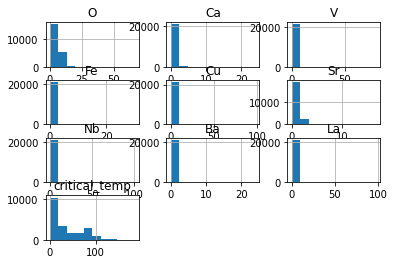

In [48]:
df_material[row_unique_cols].hist()

In [49]:
df_material['Ca'].nunique()

265

In [50]:
# get correlation matrix
correlated_features = []
correlation_matrix = df_material.corr()

##### Relationship with O, Ca, Cu, Ba vs Critical Temp

##### Correlation Heatmap

In [ ]:
correlation_matrix[abs(correlation_matrix['critical_temp']) > 0.2]['critical_temp']

In [46]:
sns.heatmap(correlation_matrix.loc[['Ca', 'O', 'Cu', 'Ba', 'critical_temp'], ['Ca', 'O', 'Cu', 'Ba', 'critical_temp', 'element_count']], annot=True)

NameError: name 'correlation_matrix' is not defined

### EDA feature data

## Feature Selection

In [12]:
X = full_df.drop(columns=['critical_temp'], inplace=False)
y = full_df['critical_temp']

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 20, 30], 'max_features': [10, 30, 50, 80]},
    {'bootstrap': [False], 'n_estimators': [3, 5, 10, 30], 'max_features': [10, 30, 50, 80]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [10, 30, 50, 80],
                          'n_estimators': [3, 10, 20, 30]},
                         {'bootstrap': [False],
                          'max_features': [10, 30, 50, 80],
                          'n_estimators': [3, 5, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [15]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, col_list[0:-1]), reverse=True)

[(0.07495498998141373, 'range_ThermalConductivity'),
 (0.045939688348001585, 'range_atomic_radius'),
 (0.03894309344096424, 'gmean_Valence'),
 (0.03783664169973034, 'wtd_entropy_atomic_radius'),
 (0.03421776060156034, 'Cu'),
 (0.031029752175158055, 'wtd_entropy_Valence'),
 (0.02994965651347795, 'wtd_mean_Valence'),
 (0.029192920661386824, 'mean_ThermalConductivity'),
 (0.029112650678524907, 'wtd_std_ThermalConductivity'),
 (0.02470837733917401, 'wtd_mean_ThermalConductivity'),
 (0.024589043528532237, 'Ca'),
 (0.024409758138352146, 'entropy_atomic_radius'),
 (0.023475944583422843, 'std_atomic_radius'),
 (0.023464084126181353, 'std_ThermalConductivity'),
 (0.022721588444061382, 'wtd_gmean_Valence'),
 (0.021747429424559636, 'wtd_gmean_Density'),
 (0.02083532670440353, 'range_fie'),
 (0.02049127408542418, 'Ba'),
 (0.017492306796597235, 'O'),
 (0.017355037468770575, 'wtd_entropy_FusionHeat'),
 (0.01706108165695313, 'gmean_Density'),
 (0.017003423823206347, 'wtd_std_ElectronAffinity'),
 (0.0

In [16]:
df_material[df_material.columns.difference(['O','Cu','Ba', 'Ca', 'material', 'critical_temp'])]

,Ag,Al,Ar,As,At,Au,B,Be,Bi,Br,...,Ti,Tl,Tm,V,W,Xe,Y,Yb,Zn,Zr
0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
1,0.1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
2,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
3,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
4,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.84,0.0,0.0,0,0.0,0.0,0.0,0.0
21259,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
21260,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
21261,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0


In [17]:
df_material['Other_Materials'] = df_material[df_material.columns.difference(['O','Cu','Ba', 'Ca', 'material', 'critical_temp'])].sum(axis=1)

In [18]:
df_material_new = df_material.drop(df_material.columns.difference(['O','Cu','Ba', 'Ca', 'Other_Materials']), 1, inplace=False)

In [19]:
df_material_new

,O,Ca,Cu,Ba,Other_Materials
0,4.0,0.0,1.0,0.20,1.80
1,4.0,0.0,0.9,0.10,2.00
2,4.0,0.0,1.0,0.10,1.90
3,4.0,0.0,1.0,0.15,1.85
4,4.0,0.0,1.0,0.30,1.70
...,...,...,...,...,...
21258,0.0,0.0,0.0,0.00,9.00
21259,11.0,3.0,4.0,2.00,1.00
21260,0.0,0.0,0.0,0.00,1.00
21261,0.0,0.0,0.0,0.00,1.00


In [20]:
 col_to_remove = ['std_Valence','entropy_ThermalConductivity','gmean_atomic_mass','gmean_fie','std_FusionHeat','mean_fie','mean_FusionHeat','range_FusionHeat', 'range_Valence']

In [21]:
df_feature_new = df_feature.drop(columns=col_to_remove, inplace=False)

In [22]:
df_feature_new

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1.085714,0.437059,29.00
1,5,92.729214,58.518416,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,1.128571,0.468606,26.00
2,4,88.944468,57.885242,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1.114286,0.444697,19.00
3,4,88.944468,57.873967,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,138.528893,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1.100000,0.440952,22.00
4,4,88.944468,57.840143,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,138.493671,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1.057143,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,46.595943,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,2.168889,0.496904,2.44
21259,5,92.266740,49.021367,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,156.558695,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,0.904762,0.212959,122.10
21260,2,99.663190,95.609104,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,6.800000,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,3.200000,0.400000,1.98
21261,2,99.663190,97.095602,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,7.862385,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,2.210000,0.462493,1.84


In [23]:
full_df_new = pd.concat([df_material_new, df_feature_new], axis=1, ignore_index=True)
full_df_new.columns = df_material_new.columns.values.tolist() + df_feature_new.columns.values.tolist()

In [24]:
full_df_new

,O,Ca,Cu,Ba,Other_Materials,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,...,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence,critical_temp
0,4.0,0.0,1.0,0.20,1.80,4,88.944468,57.862692,36.116612,1.181795,...,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1.085714,0.437059,29.00
1,4.0,0.0,0.9,0.10,2.00,5,92.729214,58.518416,36.396602,1.449309,...,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,1.128571,0.468606,26.00
2,4.0,0.0,1.0,0.10,1.90,4,88.944468,57.885242,36.122509,1.181795,...,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1.114286,0.444697,19.00
3,4.0,0.0,1.0,0.15,1.85,4,88.944468,57.873967,36.119560,1.181795,...,138.528893,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1.100000,0.440952,22.00
4,4.0,0.0,1.0,0.30,1.70,4,88.944468,57.840143,36.110716,1.181795,...,138.493671,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1.057143,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0.0,0.0,0.00,9.00,4,106.957877,53.095769,43.135565,1.177145,...,46.595943,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,2.168889,0.496904,2.44
21259,11.0,3.0,4.0,2.00,1.00,5,92.266740,49.021367,32.867748,1.323287,...,156.558695,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,0.904762,0.212959,122.10
21260,0.0,0.0,0.0,0.00,1.00,2,99.663190,95.609104,95.464320,0.690847,...,6.800000,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,3.200000,0.400000,1.98
21261,0.0,0.0,0.0,0.00,1.00,2,99.663190,97.095602,96.901083,0.690847,...,7.862385,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,2.210000,0.462493,1.84


# Outliers

In [25]:
X_new = full_df.drop(columns=['critical_temp'], inplace=False)
y_new = full_df['critical_temp']

In [26]:
from scipy import stats

z_scores = stats.zscore(full_df_new)

abs_z_scores = np.abs(z_scores)
abs_z_scores

array([[0.25996474, 0.28618976, 0.13309626, ..., 0.40616628, 0.52006971,
        0.15826733],
       [0.25996474, 0.28618976, 0.18118875, ..., 0.36235194, 0.45082134,
        0.24584948],
       [0.25996474, 0.28618976, 0.13309626, ..., 0.37695672, 0.50330427,
        0.45020782],
       ...,
       [0.78947459, 0.28618976, 0.61402119, ..., 1.75534096, 0.60141582,
        0.94709052],
       [0.78947459, 0.28618976, 0.61402119, ..., 0.7432298 , 0.46423977,
        0.95117769],
       [0.78947459, 0.28618976, 0.61402119, ..., 0.32407265, 1.81314381,
        0.63121092]])

In [27]:
abs_z_scores.drop(abs_z_scores[(abs_z_scores > 5).any(1)].index, axis=0,inplace=True)
abs_z_scores.index

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
df_processed = full_df_new.iloc[abs_z_scores.index, :]

In [ ]:
df_processed

In [ ]:
X_new = df_processed.drop(columns=['critical_temp'], inplace=False)
y_new = df_processed['critical_temp']

# Normalization

In [ ]:
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Model Building

When building the L1 and L2 models, the metric used to determine which model performed the best was the Mean Square Error. To maximize the usage of the full dataset, 5-Fold Cross Validation is utilized for sampling. To tune both the L1 and L2 models, varying alpha's were used to pick the best of the choices. With the usage of alpha tuning and cross validation the best L1 and L2 model can be built.

For the L1 model, the best result was a MSE of 318.13 with an alpha of 0.01. For the L2 model the best result was a MSE of 318.42 with an alpha of 17. While the L1 model performed better, the L2 model performance was incredible close to the L1 model. While both models would be valid choices for this problem, L1 as the added benefit of feature reduction which is beneficial with number for variables in this dataset.

In [ ]:
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()
ln_model.fit(X_new_scaled, y_new)
abs(cross_val_score(ln_model, X_new_scaled, y_new, cv=5, scoring='neg_mean_squared_error')).mean()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

l1_params = {'alpha':[0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5], 'random_state': [42]}
# l2_params = {'alpha':np.linspace(5,20,4)}

l1_grid_search = GridSearchCV(Lasso(), l1_params, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
l1_grid_search.fit(X_new_scaled, y_new)

In [ ]:
l1_grid_search.best_estimator_

In [ ]:
abs(cross_val_score(l1_grid_search.best_estimator_, X_new_scaled, y_new, cv=5, scoring='neg_mean_squared_error')).mean()

In [ ]:
sorted(zip(abs(l1_grid_search.best_estimator_.coef_), df_processed.columns.values.tolist()[0:-1]), reverse=True)

In [ ]:
from sklearn.linear_model import Ridge

l2_params = {'alpha':[10,13, 15, 17, 20], 'random_state': [42]}

l2_grid_search = GridSearchCV(Ridge(), l2_params, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
l2_grid_search.fit(X_new_scaled, y_new)

In [ ]:
l2_grid_search.best_estimator_

In [ ]:
abs(cross_val_score(l2_grid_search.best_estimator_, X_new_scaled, y_new, cv=5, scoring='neg_mean_squared_error')).mean()

# Model Evaluation 

With the higher performing model (L1), the most important variables in determine critical temperature were variables related to Entropy, Electron Affinity, FIE and Atomic Mass. These variables aim to measure the material's general properties, which makes sense in under standing how these materials would behave when electrical currents are ran through them. While many elements were used in understanding critical temperature, most were not significantly important to determining critical temperature. The only element to be in the top 20 most important variables in determining critical temperature was Barium. 

# Conclusion

When determining critical temperature the best model to use is L1. The feature reduction this model provides for this dataset is invaluable. To maximize the results this model, data cleaning and normalized will be vital. When removing outliers it is important to evaluate this independently to prevent important information that might be loss in these observations.

While an alternative model that is more powerful could be used on this dataset, linear regression is powerful and easy to understand. This basic, but powerful model will help scientist to make more education decisions on what to look for when making future superconductors.